In [2]:
import numpy as np

In [3]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 2.0.0


In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
X_train = pd.read_csv('/home/pedro/TpIAFiuba/Datos/X_train_con_escalado.csv', encoding = 'unicode_escape')
X_test = pd.read_csv('/home/pedro/TpIAFiuba/Datos/X_test_con_escalado.csv', encoding = 'unicode_escape')

y_train = pd.read_csv('/home/pedro/TpIAFiuba/Datos/y_train.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)
y_test = pd.read_csv('/home/pedro/TpIAFiuba/Datos/y_test.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)

Los hiperparametros de los modelos los sacamos de los anteriores entrenamientos (Entrenamientos sin reducción)

In [6]:
from lightgbm import LGBMClassifier

In [7]:
lgbm_clf = LGBMClassifier(random_state=10, n_estimators=120)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rf_clf = RandomForestClassifier(random_state=10, min_samples_leaf=2)

In [10]:
import xgboost as xgb

In [11]:
xgb_clf = xgb.XGBClassifier(random_state=10, alpha=7)

In [13]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, random_state=10)

In [17]:
X_train["preds_rf"] = rf_clf.predict(X_train)

In [19]:
lgbm_clf.fit(X_train, y_train)

LGBMClassifier(n_estimators=120, random_state=10)

In [20]:
X_train["preds_lgbm"] = lgbm_clf.predict(X_train)

In [21]:
X_train.head(1)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex_1,Sex_2,AgeCategory_0,AgeCategory_1,AgeCategory_2,AgeCategory_3,Race_0,Race_1,Race_2,Diabetic,PhysicalActivity,GenHealth_0,GenHealth_1,GenHealth_2,SleepTime,Asthma,KidneyDisease,SkinCancer,preds_rf,preds_lgbm
0,-0.313,0,0,0,-0.55,0.083,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1.155,0,0,0,0,0


In [22]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=7, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [23]:
X_test["preds_rf"] = rf_clf.predict(X_test)
X_test["preds_lgbm"] = lgbm_clf.predict(X_test)

preds = xgb_clf.predict(X_test)

In [15]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [24]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.77      0.73      0.74      8211
           1       0.74      0.78      0.76      8211

    accuracy                           0.75     16422
   macro avg       0.75      0.75      0.75     16422
weighted avg       0.75      0.75      0.75     16422



In [25]:
recall_score(y_test, preds)

0.7782243332115455

In [26]:
accuracy_score(y_test, preds)

0.7516745828766289

In [27]:
cm = confusion_matrix(y_test, preds)

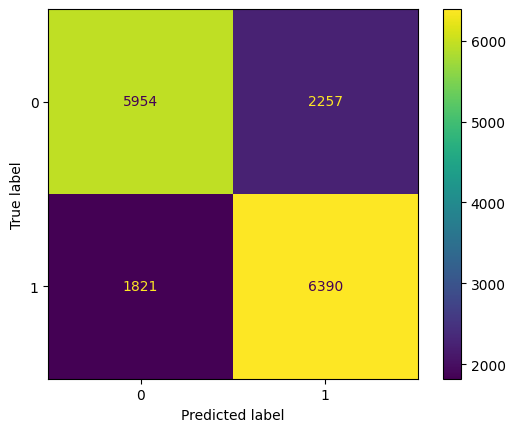

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf.classes_)
disp.plot()

# Tercer modelo

In [31]:
X_train["preds_xgb"] = xgb_clf.predict(X_train)

In [32]:
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex_1,Sex_2,AgeCategory_0,AgeCategory_1,AgeCategory_2,AgeCategory_3,Race_0,Race_1,Race_2,Diabetic,PhysicalActivity,GenHealth_0,GenHealth_1,GenHealth_2,SleepTime,Asthma,KidneyDisease,SkinCancer,preds_rf,preds_lgbm,preds_xgb
0,-0.313,0,0,0,-0.550,0.083,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1.155,0,0,0,0,0,0
1,-0.321,0,0,0,-0.252,-0.034,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1.155,1,0,1,0,0,0
2,0.210,0,0,0,-0.550,-0.502,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0.535,0,0,0,0,0,0
3,0.285,0,0,0,-0.550,-0.502,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,-0.085,0,0,0,0,0,0
4,0.430,1,0,0,1.933,1.253,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,-1.946,0,0,0,0,0,0


In [34]:
X_test["preds_xgb"] = xgb_clf.predict(X_test)
#Los otros dos ya estaban agregados de antes

In [36]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input

2023-07-08 00:55:34.541032: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 00:55:34.656946: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 00:55:34.657955: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 00:55:35.928393: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [37]:
from tensorflow.keras.optimizers import Adam

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
from tensorflow.keras.utils import set_random_seed

In [40]:
import tensorflow as tf

In [41]:
set_random_seed(10)

In [46]:
model = Sequential([
    Dense(1000, activation="tanh", input_shape=(28,)),
    Dense(100, activation="tanh"),
    Dense(10, activation="tanh"),
    Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              29000     
                                                                 
 dense_5 (Dense)             (None, 100)               100100    
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 130121 (508.29 KB)
Trainable params: 130121 (508.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.Recall()])

In [48]:
early_stopper = EarlyStopping(patience=15, restore_best_weights=True, monitor = "val_loss")

In [49]:
model.fit(X_train, 
          y_train, 
          epochs=100, 
          batch_size=300, 
          callbacks=[early_stopper],
          validation_split=0.15)

Epoch 1/100
109/109 [==============================] - 3s 16ms/step - loss: 0.3567 - recall_1: 0.8987 - val_loss: 0.4244 - val_recall_1: 0.9099
Epoch 2/100
109/109 [==============================] - 1s 8ms/step - loss: 0.3100 - recall_1: 0.9139 - val_loss: 0.3779 - val_recall_1: 0.9099
Epoch 3/100
109/109 [==============================] - 1s 9ms/step - loss: 0.3061 - recall_1: 0.9139 - val_loss: 0.3671 - val_recall_1: 0.9099
Epoch 4/100
109/109 [==============================] - 1s 9ms/step - loss: 0.3042 - recall_1: 0.9139 - val_loss: 0.3802 - val_recall_1: 0.9099
Epoch 5/100
109/109 [==============================] - 1s 9ms/step - loss: 0.3030 - recall_1: 0.9139 - val_loss: 0.3906 - val_recall_1: 0.9099
Epoch 6/100
109/109 [==============================] - 1s 8ms/step - loss: 0.3022 - recall_1: 0.9139 - val_loss: 0.3617 - val_recall_1: 0.9099
Epoch 7/100
109/109 [==============================] - 1s 8ms/step - loss: 0.3018 - recall_1: 0.9139 - val_loss: 0.3778 - val_recall_1: 0.909

In [91]:
def treshold_05(x):
  if x > 0.5:
    return 1
  return 0

In [92]:
preds = model.predict(X_test)

514/514 [==============================] - 1s 2ms/step


In [93]:
preds_05 = np.vectorize(treshold_05)(preds)

In [94]:
recall_score(y_test, preds_05)

0.7782243332115455

In [95]:
accuracy_score(y_test, preds_05)

0.7516745828766289

In [96]:
cm_05 = confusion_matrix(y_test, preds_05)

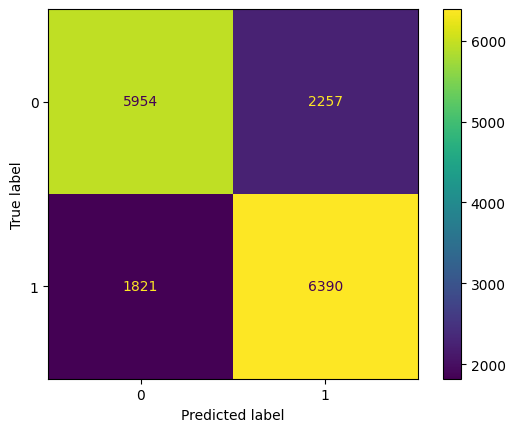

In [97]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_05)
disp.plot()

In [98]:
def treshold_03(x):
  if x > 0.3:
    return 1
  return 0

In [99]:
preds_03 = np.vectorize(treshold_03)(preds)

In [100]:
recall_score(y_test, preds_03)

0.7782243332115455

In [101]:
accuracy_score(y_test, preds_03)

0.7516745828766289

In [102]:
cm_03 = confusion_matrix(y_test, preds_03)

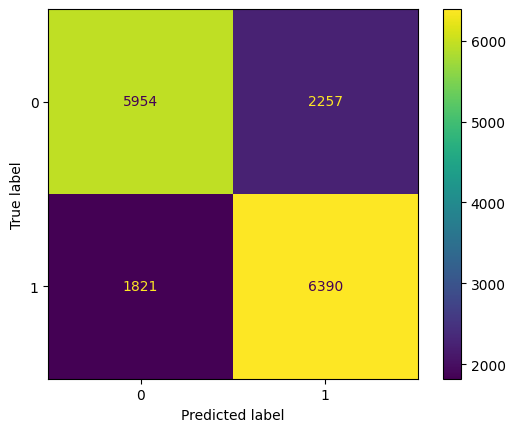

In [103]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_03)
disp.plot()